In [1]:
# load the needed python and basf2 libraries
import glob, sys, math, time, os
from array import array
import numpy as np
import math
import root_pandas
import pandas as pd
import scipy
from scipy import stats
from scipy.optimize import curve_fit 
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.colors import LogNorm

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Welcome to JupyROOT 6.24/00


In [2]:
efficiency_df = pd.read_pickle("efficiency_df.pkl")
weights_dfmc = pd.read_pickle("weights_dfmc.pkl")

In [3]:
# seleziono i dati che stanno all'interno dei miei sensori, 
# con query praticamente filtri i dati ad una condizione che è quella scritta tra parentesi
# la variabile t mi serve per fare la scala di colori dopo

query = 'gamma_E>0.1 and gamma_E<1.5 and gamma_dr>1 and gamma_dr<17 and gamma_lambdaResidui > (-0.09) and gamma_lambdaResidui < 0.09 and gamma_phiResidui > (-0.09) and gamma_phiResidui < 0.09'

df_filtered = efficiency_df.query(query)
df_filteredmc = weights_dfmc.query(query)

df_filt_theta = efficiency_df.query(query)
df_filt_thetamc = weights_dfmc.query(query)



print(len(df_filtered.gamma_x))
print(len(df_filteredmc.gamma_x))

849009
594640


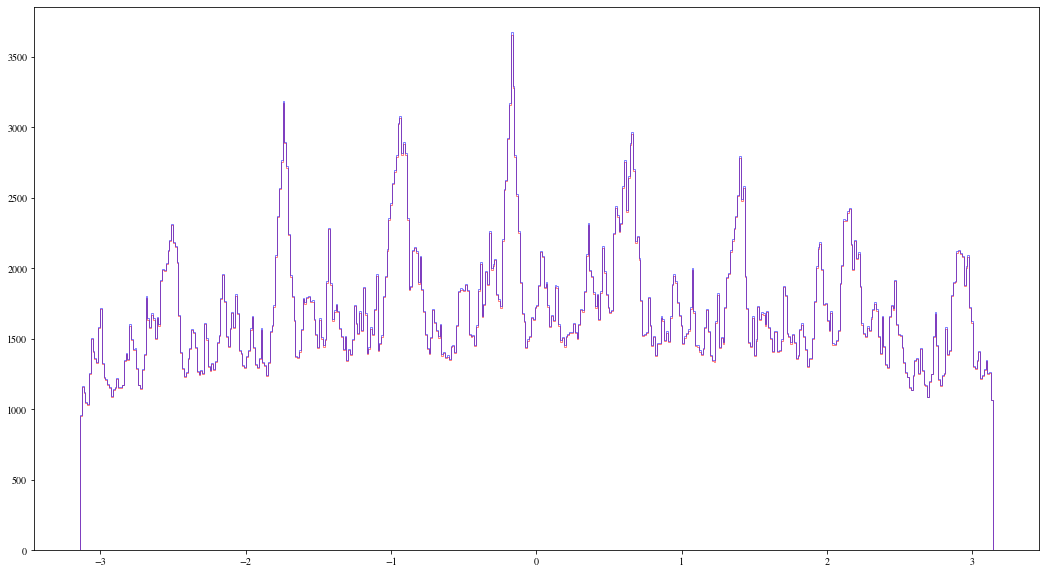

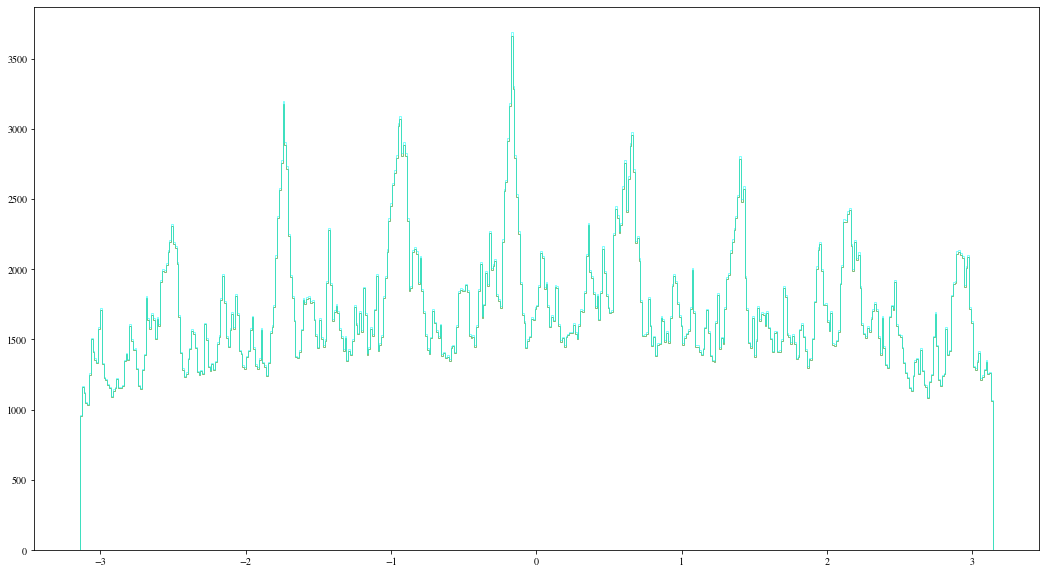

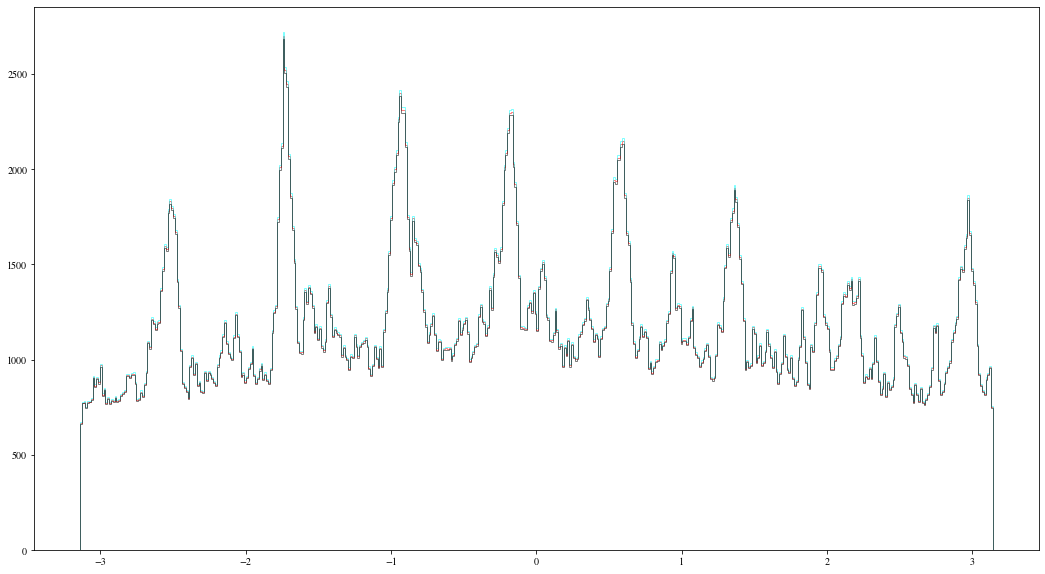

In [4]:
#coordinata phi

fig, ax = plt.subplots(figsize=(18,10))

n, bins, patches = ax.hist(df_filt_theta.gamma_dphi, bins=500, alpha=0.5, 
                            color="red", histtype='step', label='e0022')
neff, bins, patches = ax.hist(df_filt_theta.gamma_dphi, bins=500, alpha=0.5, 
                           weights=1/df_filt_theta.efficiency, color="blue", histtype='step', label='e0022')


fig, ax = plt.subplots(figsize=(18,10))


np3sigma, bins, patches = ax.hist(df_filt_theta.gamma_dphi, bins=500, alpha=0.5, density=False,
                           weights=1/df_filt_theta.piu1sigmaeff, color="green", histtype='step', label='e0022')
nm3sigma, bins, patches = ax.hist(df_filt_theta.gamma_dphi, bins=500, alpha=0.5, density=False,
                           weights=1/df_filt_theta.meno1sigmaeff, color="cyan", histtype='step', label='e0022')



fig, ax = plt.subplots(figsize=(18,10))

nmc, binsmc, patchesmc = ax.hist(df_filt_thetamc.gamma_dphi, bins=500, alpha=0.5, 
                                  weights=df_filt_thetamc.weights, color="red", histtype='step', label='e0022')
nmcp3sigma, binsmcp3s, patchesmcp3s = ax.hist(df_filt_thetamc.gamma_dphi, bins=500, alpha=0.5, 
                                  weights=df_filt_thetamc.piu1sigma, color="cyan", 
                                           histtype='step', density=False)

nmcm3sigma, binsmcm3s, patchesmcm3s = ax.hist(df_filt_thetamc.gamma_dphi, bins=500, alpha=0.5, 
                                  weights=df_filt_thetamc.meno1sigma, color="black", 
                                           histtype='step', density=False)

In [5]:
nerrstat = np.sqrt(n) / (sum(n) * np.diff(bins))
nerreff = (np3sigma-nm3sigma) / (sum(n) * np.diff(bins))
nmcerrstat = np.sqrt(nmc) / (sum(nmc) * np.diff(bins))
nmcerreff = (nmcp3sigma-nmcm3sigma) / (sum(nmc) * np.diff(bins))
nerr = np.sqrt(nerrstat**2+nerreff**2)
nmcerr = np.sqrt(nmcerrstat**2+nmcerreff**2)

print(sum((np3sigma+nm3sigma)/2))

853540.0793714229


In [6]:
bins = np.delete(bins, 500)

No handles with labels found to put in legend.


Text(0.35, 0.95, '# Hits e0022 = 849009\n# Hits MC14 = 594640')

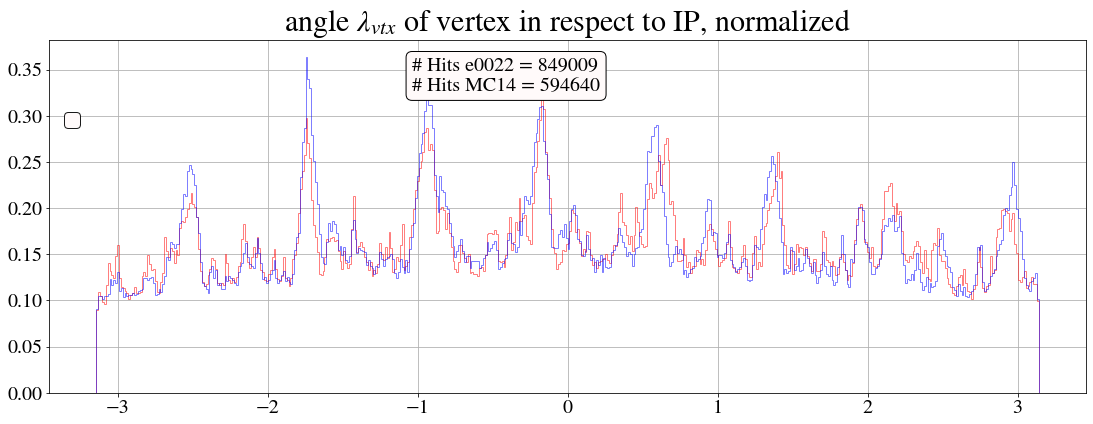

In [7]:
fig, ax1 = plt.subplots(figsize=(18,7))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)




nn, binsn, patchesn = ax1.hist(df_filt_theta.gamma_dphi, density=True, bins=500, alpha=0.5, 
                             weights=1/df_filt_theta.efficiency, color="red", histtype='step')
nmcn, binsmcn, patchesmcn = ax1.hist(df_filt_thetamc.gamma_dphi, density=True, bins=500, alpha=0.5, 
                                 weights=df_filt_thetamc.weights, color="blue", histtype='step')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"angle $\lambda_{vtx}$ of vertex in respect to IP, normalized", fontsize=30)
#ax1.set_xlabel(r"$\lambda_{vtx}$ [rad]",fontsize=30)
ax1.legend(loc=[0.014, 0.75], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()
textstr = '\n'.join((
                    r'# Hits e0022 = %s' % (len(df_filt_theta.gamma_z), ),
                    r'# Hits MC14 = %s' % (len(df_filt_thetamc.gamma_z), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.35, 0.95, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

Text(0.015, 0.95, '# Hits exp22 = 849009\n# Hits MC14ri_a = 594640')

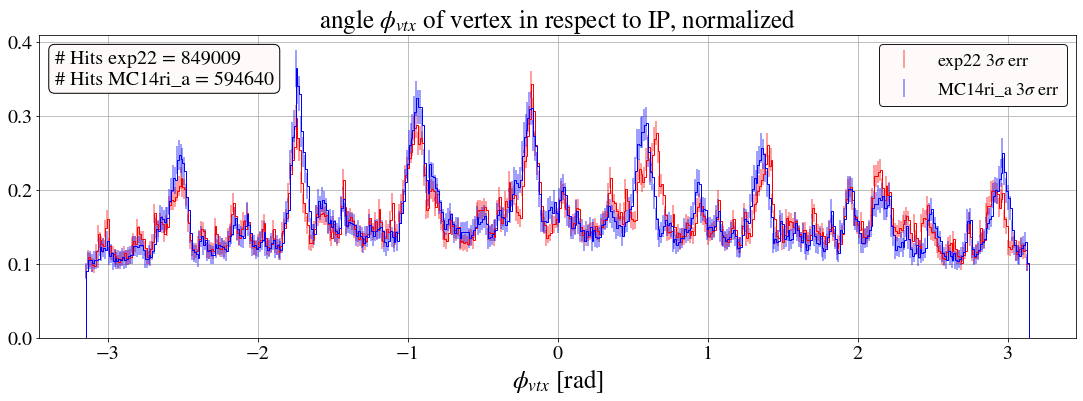

In [8]:

fig, ax2 = plt.subplots(figsize=(18,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)



nn, binsn, patchesn = ax2.hist(df_filt_theta.gamma_dphi, density=True, bins=500, alpha=1, 
                             weights=1/df_filt_theta.efficiency, color="red", histtype='step')
nmcn, binsmcn, patchesmcn = ax2.hist(df_filt_thetamc.gamma_dphi, density=True, bins=500, alpha=1, 
                                 weights=df_filt_thetamc.weights, color="blue", histtype='step')

binsn = np.delete(binsn,500)
binsmcn = np.delete(binsmcn, 500)

ax2.errorbar(binsn, nn, yerr=3*nerr, alpha=0.5, color="red", 
             label='exp22 $3\sigma$ err', marker='', markersize=3, linestyle='')
ax2.errorbar(binsmcn, nmcn, yerr=3*nmcerr, alpha=0.5, color="blue", 
             label=r'MC14ri_a $3\sigma$ err', marker='', markersize=3, linestyle='')


ax2.tick_params(axis='x',labelsize=20);
ax2.tick_params(axis='y',labelsize=20);
ax2.set_title(r"angle $\phi_{vtx}$ of vertex in respect to IP, normalized", fontsize=25)
ax2.set_xlabel(r"$\phi_{vtx}$ [rad]",fontsize=25)
ax2.grid()
ax2.legend(loc="upper right", fontsize=18, facecolor='snow', framealpha=1, edgecolor='0.1')

textstr = '\n'.join((
                    r'# Hits exp22 = %s' % (len(df_filt_theta.gamma_z), ),
                    r'# Hits MC14ri_a = %s' % (len(df_filt_thetamc.gamma_z), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.015, 0.95, textstr, transform=ax2.transAxes, fontsize=20, verticalalignment='top', bbox=props)



In [9]:
bins = np.delete(binsmcm3s, 500)

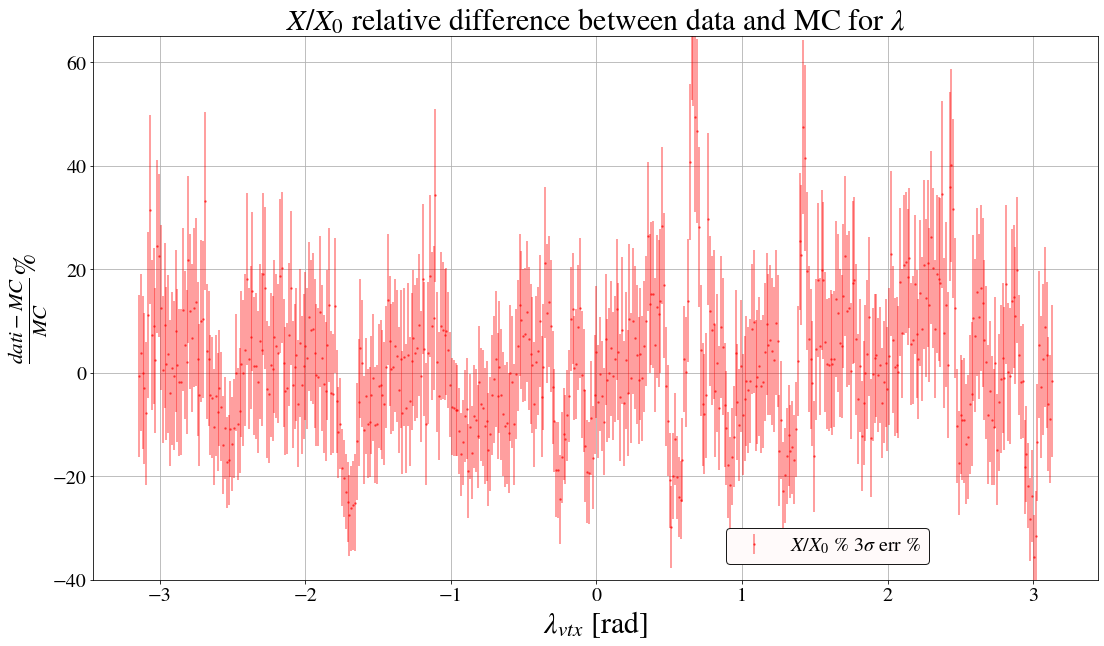

In [10]:
x_0per = (nn)/nmcn - 1

x_0perErr = np.sqrt(nerr**2/(nmcn**2) + ((nn**2)/(nmcn**4))*nmcerr**2)

fig, ax = plt.subplots(figsize=(18,10))

ax.errorbar(bins, (x_0per*100), yerr=3*x_0perErr*100, alpha=0.5, color="red", 
             label=r'$X/X_0$ % $3\sigma$ err %', marker='.', markersize=3, linestyle='')
#ax.vlines(ECLbins[0],-60,80, color='slategray', label='ECL acceptance limit')
#ax.vlines(ECLbins[50],-60,80, color='slategray')
#ax.set_xlim(ECLbins[0],ECLbins[50])
ax.set_ylim(-40,65)
ax.tick_params(axis='x',labelsize=20);
ax.tick_params(axis='y',labelsize=20);
ax.set_title(r"$X/X_0$ relative difference between data and MC for $\lambda$", fontsize=30)
ax.set_xlabel(r"$\lambda_{vtx}$ [rad]",fontsize=30)
ax.set_ylabel(r"$\frac{dati-MC}{MC}$%",fontsize=30)
ax.grid()
ax.legend(loc=[0.63, 0.03], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')

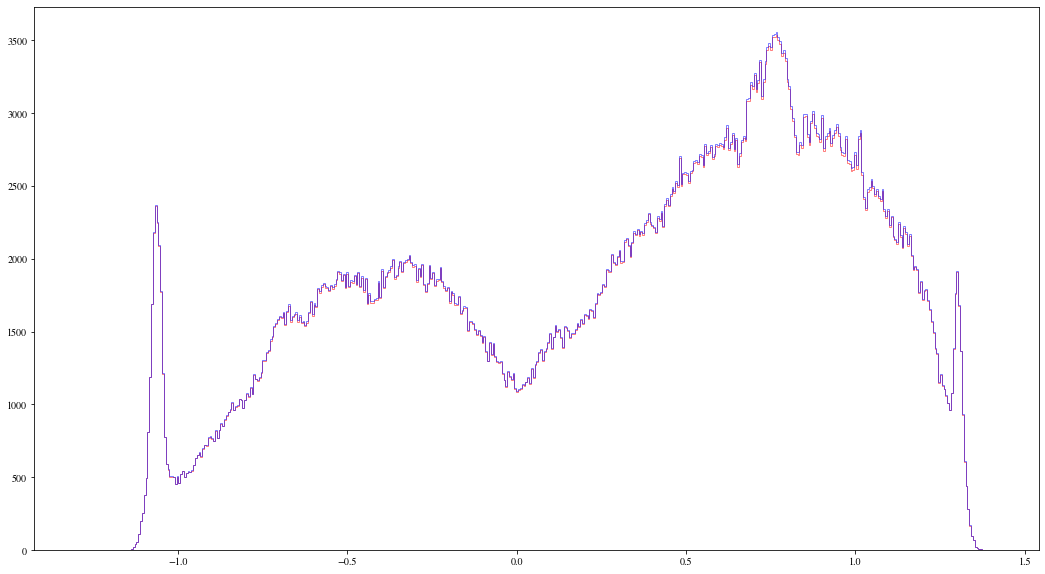

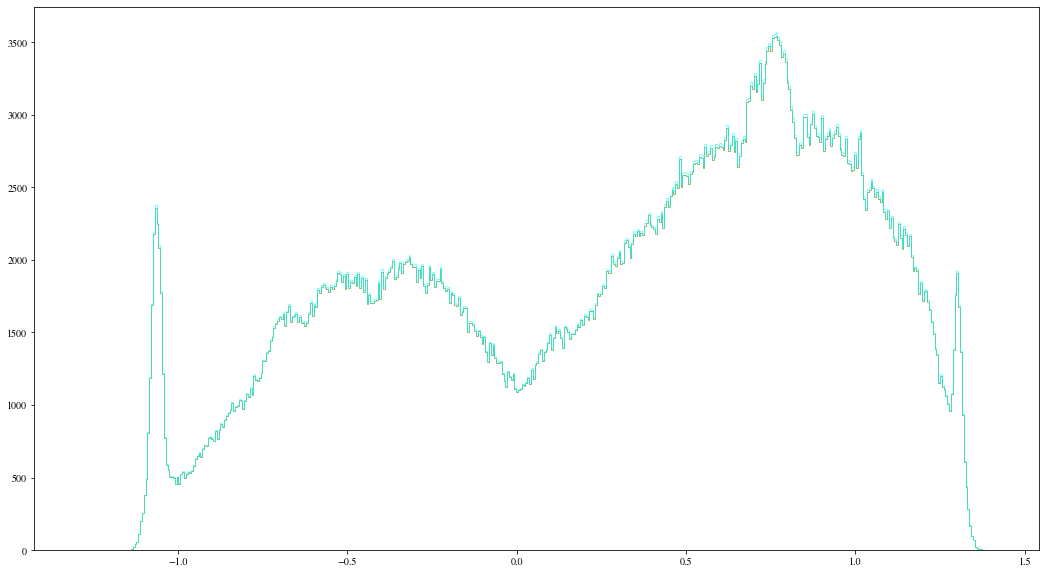

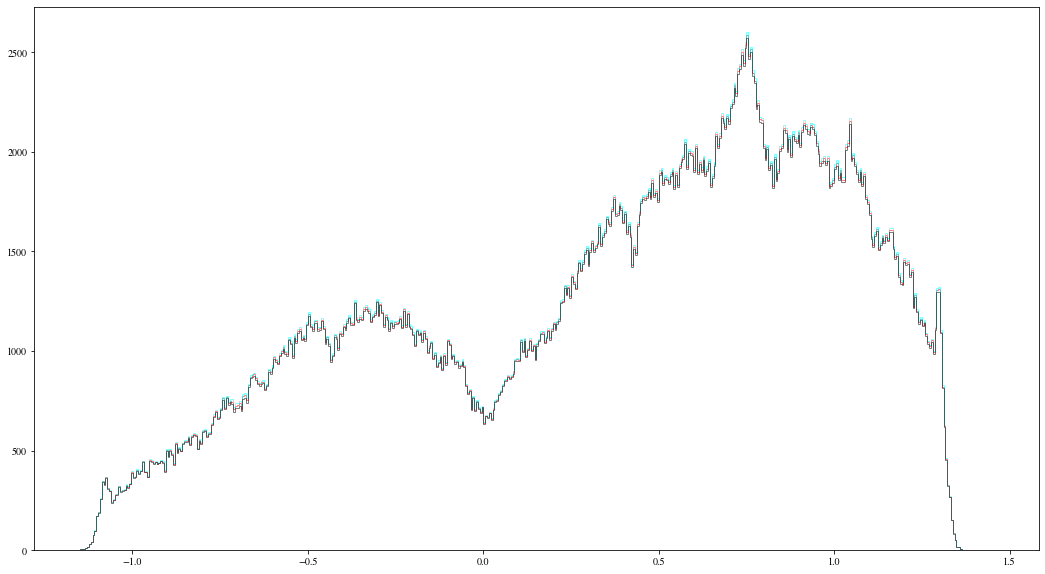

In [11]:
#coordinata lambda

ECLbins0 = -1.1111915216863517
ECLbins50 = 1.344431564898807

fig, ax = plt.subplots(figsize=(18,10))

n, bins, patches = ax.hist(df_filt_theta.gamma_lambda, bins=500, alpha=0.5, 
                            color="red", histtype='step', label='e0022')
neff, bins, patches = ax.hist(df_filt_theta.gamma_lambda, bins=500, alpha=0.5, 
                           weights=1/df_filt_theta.efficiency, color="blue", histtype='step', label='e0022')


fig, ax = plt.subplots(figsize=(18,10))


np3sigma, bins, patches = ax.hist(df_filt_theta.gamma_lambda, bins=500, alpha=0.5, density=False,
                           weights=1/df_filt_theta.piu1sigmaeff, color="green", histtype='step', label='e0022')
nm3sigma, bins, patches = ax.hist(df_filt_theta.gamma_lambda, bins=500, alpha=0.5, density=False,
                           weights=1/df_filt_theta.meno1sigmaeff, color="cyan", histtype='step', label='e0022')



fig, ax = plt.subplots(figsize=(18,10))

nmc, binsmc, patchesmc = ax.hist(df_filt_thetamc.gamma_lambda, bins=500, alpha=0.5, 
                                  weights=df_filt_thetamc.weights, color="red", histtype='step', label='e0022')
nmcp3sigma, binsmcp3s, patchesmcp3s = ax.hist(df_filt_thetamc.gamma_lambda, bins=500, alpha=0.5, 
                                  weights=df_filt_thetamc.piu1sigma, color="cyan", 
                                           histtype='step', density=False)

nmcm3sigma, binsmcm3s, patchesmcm3s = ax.hist(df_filt_thetamc.gamma_lambda, bins=500, alpha=0.5, 
                                  weights=df_filt_thetamc.meno1sigma, color="black", 
                                           histtype='step', density=False)

In [12]:
nerrstat = np.sqrt(n) / (sum(n) * np.diff(bins))
nerreff = (np3sigma-nm3sigma) / (sum(n) * np.diff(bins))
nmcerrstat = np.sqrt(nmc) / (sum(nmc) * np.diff(bins))
nmcerreff = (nmcp3sigma-nmcm3sigma) / (sum(nmc) * np.diff(bins))
nerr = np.sqrt(nerrstat**2+nerreff**2)
nmcerr = np.sqrt(nmcerrstat**2+nmcerreff**2)

print(sum((np3sigma+nm3sigma)/2))

853540.0793714226


In [13]:
bins = np.delete(bins, 500)

Text(0.35, 0.95, '# Hits e0022 = 849009\n# Hits MC14 = 594640')

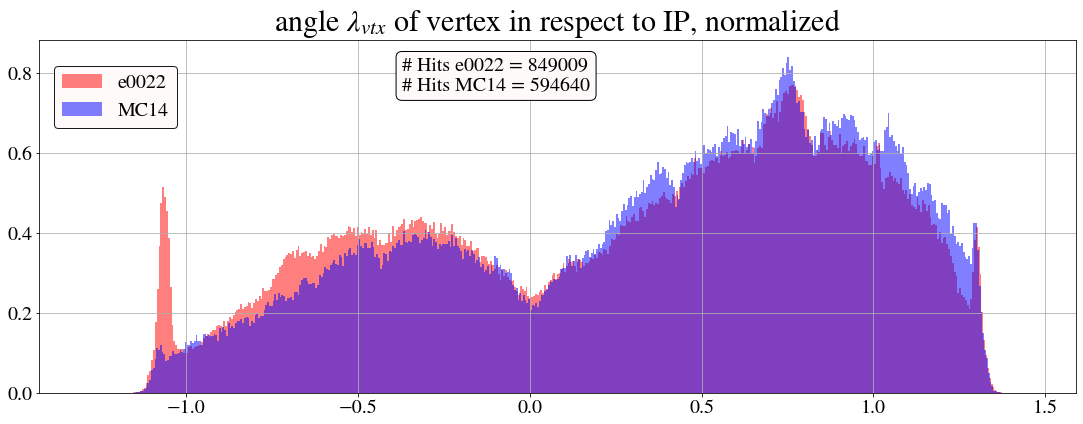

In [14]:
fig, ax1 = plt.subplots(figsize=(18,7))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)




nn, binsn, patchesn = ax1.hist(df_filt_theta.gamma_lambda, density=True, bins=500, alpha=0.5, 
                             weights=1/df_filt_theta.efficiency, color="red", histtype='bar', label='e0022')
nmcn, binsmcn, patchesmcn = ax1.hist(df_filt_thetamc.gamma_lambda, density=True, bins=500, alpha=0.5, 
                                 weights=df_filt_thetamc.weights, color="blue", histtype='bar', label='MC14')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"angle $\lambda_{vtx}$ of vertex in respect to IP, normalized", fontsize=30)
#ax1.set_xlabel(r"$\lambda_{vtx}$ [rad]",fontsize=30)
ax1.legend(loc=[0.014, 0.75], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()
textstr = '\n'.join((
                    r'# Hits e0022 = %s' % (len(df_filt_theta.gamma_z), ),
                    r'# Hits MC14 = %s' % (len(df_filt_thetamc.gamma_z), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.35, 0.95, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

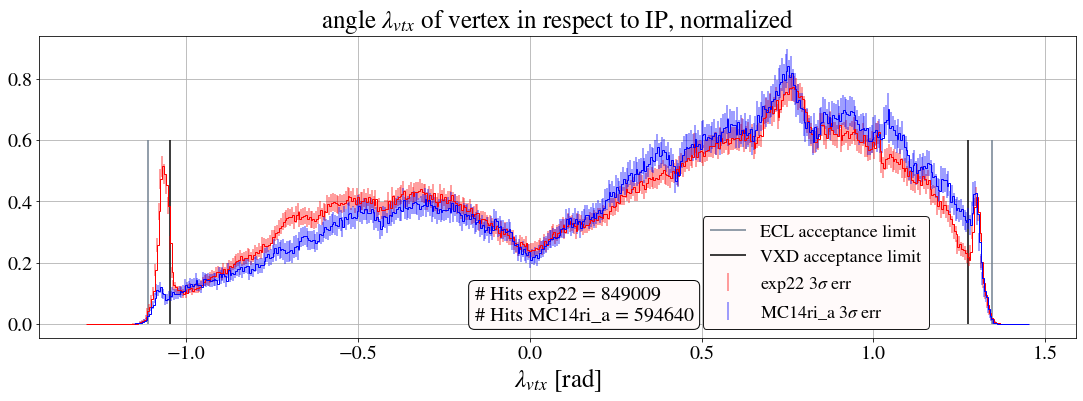

In [15]:
fig, ax2 = plt.subplots(figsize=(18,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)




n, bins, patches = ax.hist(df_filt_theta.gamma_lambda, density=True, bins=500, alpha=0.5, 
                            color="red", histtype='step', label='e0022')
nmc, binsmc, patchesmc = ax.hist(df_filt_thetamc.gamma_lambda, density=True, bins=500, alpha=1, 
                                  color="blue", histtype='step', label='MC14')

nn, binsn, patchesn = ax2.hist(df_filt_theta.gamma_lambda, density=True, bins=500, alpha=1, 
                             weights=1/df_filt_theta.efficiency, color="red", histtype='step')
nmcn, binsmcn, patchesmcn = ax2.hist(df_filt_thetamc.gamma_lambda, density=True, bins=500, alpha=1, 
                                 weights=df_filt_thetamc.weights, color="blue", histtype='step')

ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"angle $\lambda_{vtx}$ of vertex in respect to IP, normalized", fontsize=30)
#ax1.set_xlabel(r"$\lambda_{vtx}$ [rad]",fontsize=30)
ax1.legend(loc=[0.014, 0.75], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()
textstr = '\n'.join((
                    r'# Hits exp22 = %s' % (len(df_filt_theta.gamma_z), ),
                    r'# Hits MC14ri_a = %s' % (len(df_filt_thetamc.gamma_z), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.42, 0.17, textstr, transform=ax2.transAxes, fontsize=20, verticalalignment='top', bbox=props)



ax2.vlines(ECLbins0,0,0.6, color='slategray', label='ECL acceptance limit')
ax2.vlines(ECLbins50,0,0.6, color='slategray')

ax2.vlines(1.2741,0,0.6, color='black', label='VXD acceptance limit')
ax2.vlines(-1.0472,0,0.6, color='black')

binsn = np.delete(binsn,500)
binsmcn = np.delete(binsmcn, 500)

ax2.errorbar(binsn, nn, yerr=3*nerr, alpha=0.5, color="red", 
             label='exp22 $3\sigma$ err', marker='', markersize=3, linestyle='')
ax2.errorbar(binsmcn, nmcn, yerr=3*nmcerr, alpha=0.5, color="blue", 
             label=r'MC14ri_a $3\sigma$ err', marker='', markersize=3, linestyle='')


ax2.tick_params(axis='x',labelsize=20);
ax2.tick_params(axis='y',labelsize=20);
ax2.set_title(r"angle $\lambda_{vtx}$ of vertex in respect to IP, normalized", fontsize=25)
ax2.set_xlabel(r"$\lambda_{vtx}$ [rad]",fontsize=25)
ax2.grid()
ax2.legend(loc=[0.64, 0.03], fontsize=18, facecolor='snow', framealpha=1, edgecolor='0.1')




In [16]:
#bins = np.delete(binsn, 500)

<ipython-input-17-e59f990c76ef>:1: RuntimeWarning: divide by zero encountered in true_divide
  x_0per = (nn)/nmcn - 1
<ipython-input-17-e59f990c76ef>:1: RuntimeWarning: invalid value encountered in true_divide
  x_0per = (nn)/nmcn - 1
<ipython-input-17-e59f990c76ef>:3: RuntimeWarning: divide by zero encountered in true_divide
  x_0perErr = np.sqrt(nerr**2/(nmcn**2) + ((nn**2)/(nmcn**4))*nmcerr**2)
<ipython-input-17-e59f990c76ef>:3: RuntimeWarning: invalid value encountered in true_divide
  x_0perErr = np.sqrt(nerr**2/(nmcn**2) + ((nn**2)/(nmcn**4))*nmcerr**2)
<ipython-input-17-e59f990c76ef>:3: RuntimeWarning: invalid value encountered in multiply
  x_0perErr = np.sqrt(nerr**2/(nmcn**2) + ((nn**2)/(nmcn**4))*nmcerr**2)


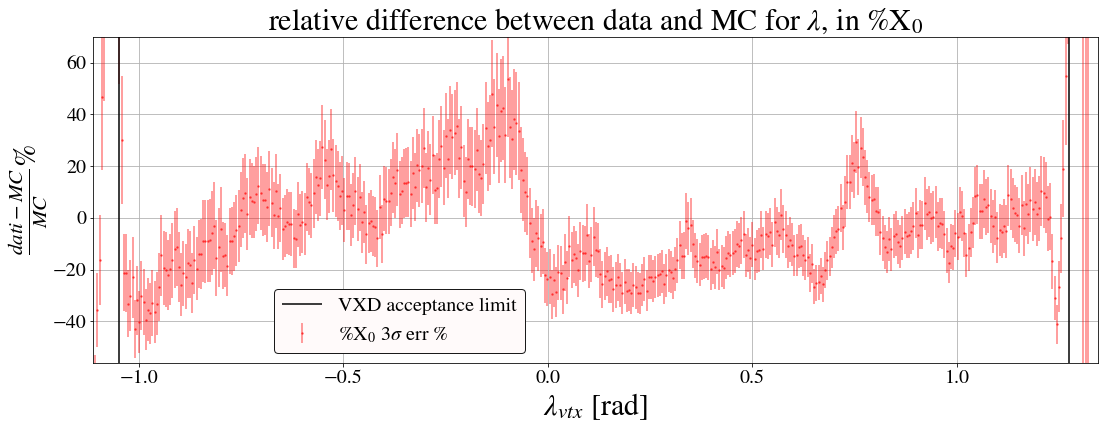

In [17]:
x_0per = (nn)/nmcn - 1

x_0perErr = np.sqrt(nerr**2/(nmcn**2) + ((nn**2)/(nmcn**4))*nmcerr**2)

fig, ax = plt.subplots(figsize=(18,6))

ax.errorbar(binsn, (x_0per*100), yerr=3*x_0perErr*100, alpha=0.5, color="red", 
             label=r'%$\mathrm{X}_0$ $3\sigma$ err %', marker='.', markersize=3, linestyle='')
#ax.vlines(ECLbins0,-60,80, color='slategray', label='ECL acceptance limit')
#ax.vlines(ECLbins50,-60,80, color='slategray')
ax.vlines(1.2741,-60,80, color='black', label='VXD acceptance limit')
ax.vlines(-1.0472,-60,80, color='black')
ax.set_xlim(ECLbins0,ECLbins50)
ax.set_ylim(-56,70)
ax.tick_params(axis='x',labelsize=20);
ax.tick_params(axis='y',labelsize=20);
ax.set_title(r"relative difference between data and MC for $\lambda$, in %$\mathrm{X}_0$", fontsize=30)
ax.set_xlabel(r"$\lambda_{vtx}$ [rad]",fontsize=30)
ax.set_ylabel(r"$\frac{dati-MC}{MC}$%",fontsize=30)
ax.grid()
ax.legend(loc=[0.18, 0.03], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')

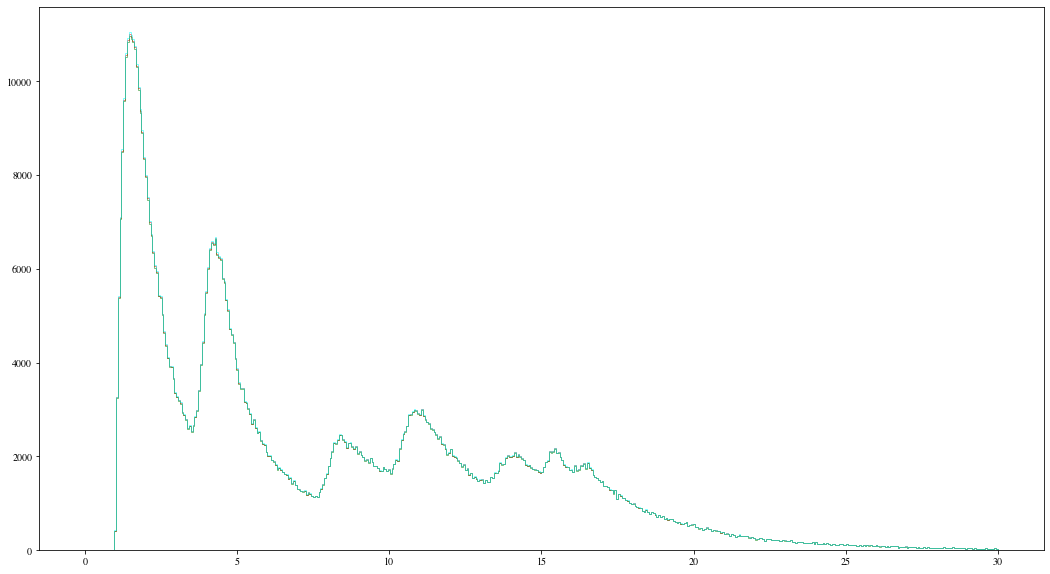

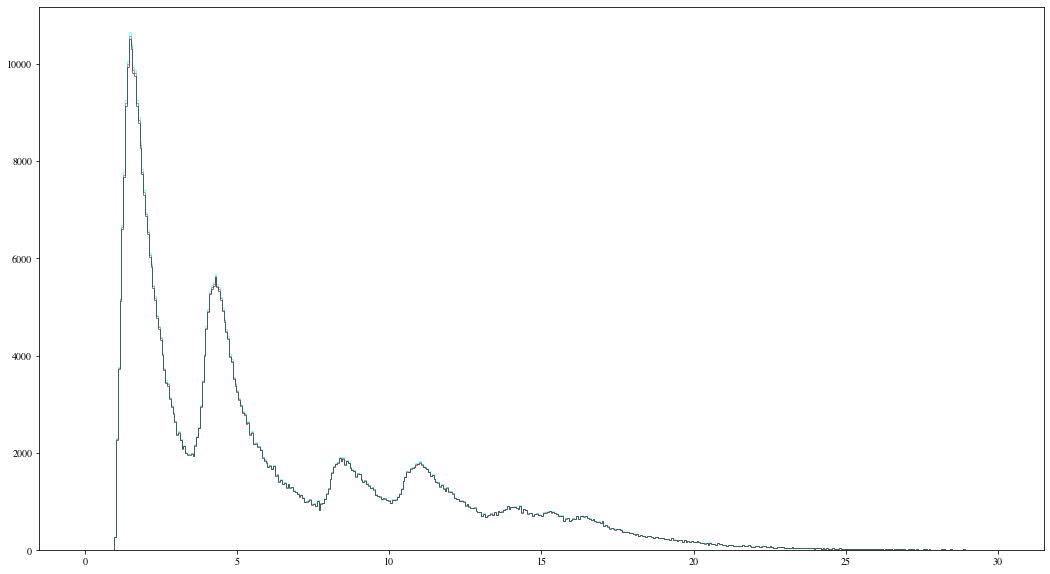

In [18]:
#coordinata rho


fig, ax = plt.subplots(figsize=(18,10))

n, bins, patches = ax.hist(np.sqrt(df_filt_theta.gamma_dr**2+df_filtered.gamma_z**2), bins=500, alpha=0.5, 
                           color="red", histtype='step', label='e0022', range=(0,30),
                           weights=1/df_filt_theta.efficiency)
np3sigma, bins, patches = ax.hist(np.sqrt(df_filt_theta.gamma_dr**2+df_filtered.gamma_z**2), bins=500, 
                                  alpha=0.5, density=False, range=(0,30),
                                  weights=1/df_filtered.piu1sigmaeff, color="green", histtype='step', 
                                  label='e0022')
nm3sigma, bins, patches = ax.hist(np.sqrt(df_filt_theta.gamma_dr**2+df_filtered.gamma_z**2), bins=500, 
                                  alpha=0.5, density=False, range=(0,30),
                                  weights=1/df_filtered.meno1sigmaeff, color="cyan", histtype='step', 
                                  label='e0022')



fig, ax = plt.subplots(figsize=(18,10))

nmc, binsmc, patchesmc = ax.hist(np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), bins=500, 
                                 alpha=0.5, range=(0,30), 
                                 weights=df_filt_thetamc.weights, color="red", histtype='step', label='e0022')
nmcp3sigma, binsmcp3s, patchesmcp3s = ax.hist(np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), 
                                              bins=500, alpha=0.5, range=(0,30), 
                                              weights=df_filt_thetamc.piu1sigma, color="cyan", 
                                              histtype='step', density=False)

nmcm3sigma, binsmcm3s, patchesmcm3s = ax.hist(np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), 
                                              bins=500, alpha=0.5, range=(0,30), 
                                              weights=df_filt_thetamc.meno1sigma, color="black", 
                                              histtype='step', density=False)

In [19]:
nerrstat = np.sqrt(n) / (sum(n) * np.diff(bins))
nerreff = (np3sigma-nm3sigma) / (sum(n) * np.diff(bins))
nmcerrstat = np.sqrt(nmc) / (sum(nmc) * np.diff(bins))
nmcerreff = (nmcp3sigma-nmcm3sigma) / (sum(nmc) * np.diff(bins))
nerr = np.sqrt(nerrstat**2+nerreff**2)
nmcerr = np.sqrt(nmcerrstat**2+nmcerreff**2)

print(sum((np3sigma+nm3sigma)/2))

852371.596991562


Text(0.78, 0.65, '# Hits e0022 = 849009\n# Hits MC14 = 594640')

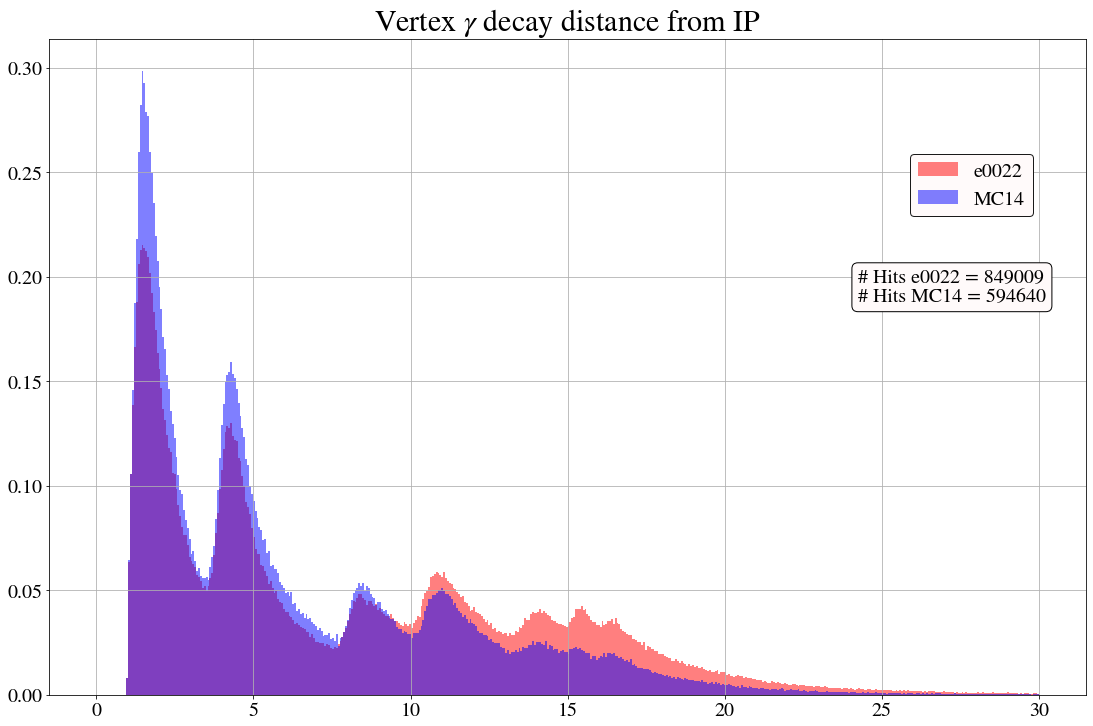

In [20]:
fig, (ax1) = plt.subplots(figsize=(18,13))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)




nn, binsn, patchesn = ax1.hist(np.sqrt(df_filt_theta.gamma_dr**2+df_filtered.gamma_z**2), density=True, 
                               bins=500, alpha=0.5, range=(0,30), 
                               weights=1/df_filt_theta.efficiency, color="red", histtype='bar', label='e0022')
nmcn, binsmcn, patchesmcn = ax1.hist(np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), density=True, 
                                     bins=500, alpha=0.5, range=(0,30),
                                     weights=df_filt_thetamc.weights, color="blue", histtype='bar', label='MC14')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"Vertex $\gamma$ decay distance from IP", fontsize=30)
#ax1.set_xlabel(r"IP distance [cm]",fontsize=30)
ax1.legend(loc=[0.83, 0.73], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()
textstr = '\n'.join((
                    r'# Hits e0022 = %s' % (len(df_filt_theta.gamma_z), ),
                    r'# Hits MC14 = %s' % (len(df_filt_thetamc.gamma_z), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.78, 0.65, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

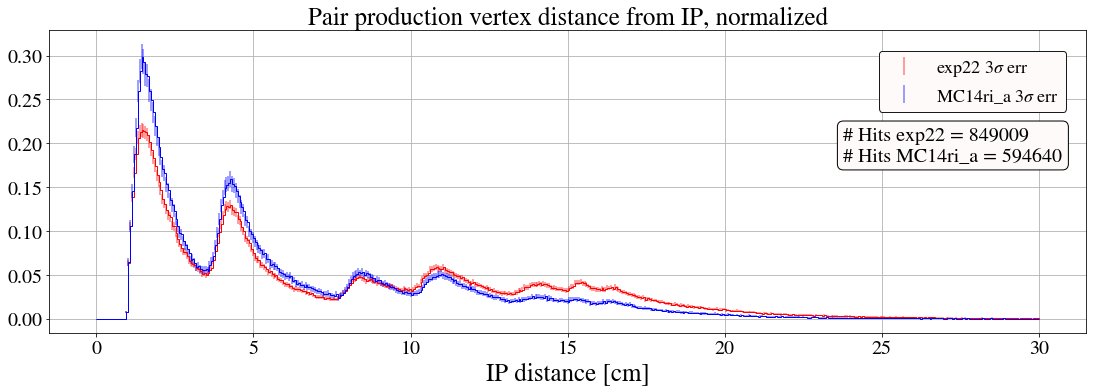

In [21]:

fig, ax2 = plt.subplots(figsize=(18,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)




n, binsn, patchesn = ax.hist(np.sqrt(df_filt_theta.gamma_dr**2+df_filtered.gamma_z**2), density=True, 
                              bins=500, alpha=0.5, range=(0,30), 
                              color="red", histtype='bar', label='e0022')
nmc, binsmcn, patchesmcn = ax.hist(np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), density=True, 
                                     bins=500, alpha=0.5, range=(0,30),
                                     color="blue", histtype='bar', label='MC14')


nn, binsn, patchesn = ax2.hist(np.sqrt(df_filt_theta.gamma_dr**2+df_filtered.gamma_z**2), density=True, 
                               bins=500, alpha=1, range=(0,30), 
                               weights=1/df_filt_theta.efficiency, color="red", histtype='step')
nmcn, binsmcn, patchesmcn = ax2.hist(np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), density=True, 
                                     bins=500, alpha=1, range=(0,30),
                                     weights=df_filt_thetamc.weights, color="blue", histtype='step')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"Vertex $\gamma$ decay distance from IP", fontsize=30)
#ax1.set_xlabel(r"IP distance [cm]",fontsize=30)
ax1.legend(loc=[0.83, 0.73], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()
textstr = '\n'.join((
                    r'# Hits exp22 = %s' % (len(df_filt_theta.gamma_z), ),
                    r'# Hits MC14ri_a = %s' % (len(df_filt_thetamc.gamma_z), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.766, 0.68, textstr, transform=ax2.transAxes, fontsize=20, verticalalignment='top', bbox=props)

#ax2.vlines(0,0,0.25, color='slategray', label='ECL a')
#ax2.vlines(13.5,0,0.25, color='slategray')
bins=np.delete(binsn, 500)
ax2.errorbar(bins, nn, yerr=3*nerr, alpha=0.5, color="red", 
             label=r'exp22 $3\sigma$ err', marker='', markersize=3, linestyle='')
ax2.errorbar(bins, nmcn, yerr=3*nmcerr, alpha=0.5, color="blue", 
             label=r'MC14ri_a $3\sigma$ err', marker='', markersize=3, linestyle='')



ax2.tick_params(axis='x',labelsize=20);
ax2.tick_params(axis='y',labelsize=20);
ax2.set_title(r"Pair production vertex distance from IP, normalized", fontsize=25)
ax2.set_xlabel(r"IP distance [cm]",fontsize=25)
ax2.grid()
ax2.legend(loc=[0.8, 0.73], fontsize=18, facecolor='snow', framealpha=1, edgecolor='0.1')




<ipython-input-22-4109635e54e5>:1: RuntimeWarning: invalid value encountered in true_divide
  x_0per = (nn)/nmcn - 1
<ipython-input-22-4109635e54e5>:3: RuntimeWarning: invalid value encountered in true_divide
  x_0perErr = np.sqrt(nerr**2/(nmcn**2) + ((nn**2)/(nmcn**4))*nmcerr**2)


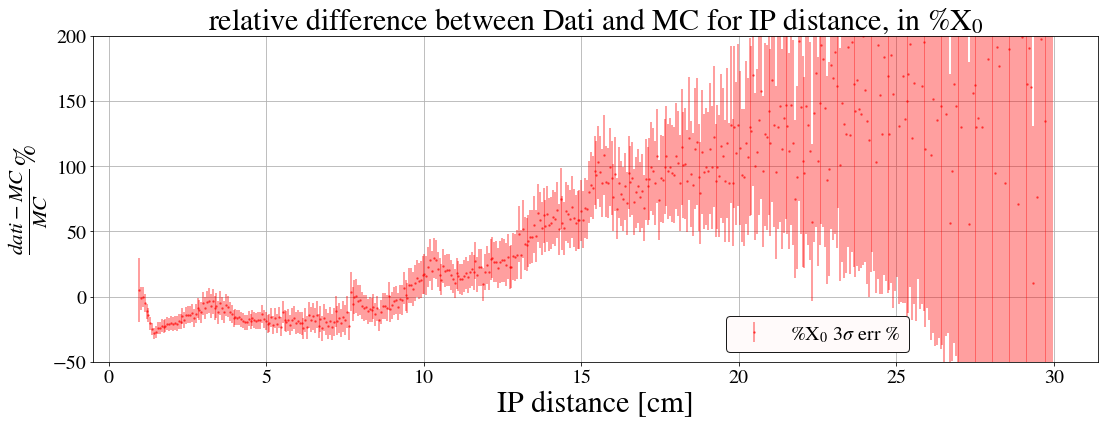

In [22]:
x_0per = (nn)/nmcn - 1

x_0perErr = np.sqrt(nerr**2/(nmcn**2) + ((nn**2)/(nmcn**4))*nmcerr**2)

fig, ax = plt.subplots(figsize=(18,6))

ax.errorbar(bins, (x_0per*100), yerr=3*x_0perErr*100, alpha=0.5, color="red", 
             label=r'%$\mathrm{X}_0$ $3\sigma$ err %', marker='.', markersize=3, linestyle='')
#ax.vlines(ECLbins[0],-60,80, color='slategray', label='ECL acceptance limit')
#ax.vlines(ECLbins[50],-60,80, color='slategray')
#ax.set_xlim(ECLbins[0],ECLbins[50])
ax.set_ylim(-50,200)
ax.tick_params(axis='x',labelsize=20);
ax.tick_params(axis='y',labelsize=20);
ax.set_title(r"relative difference between Dati and MC for IP distance, in %$\mathrm{X}_0$", fontsize=30)
ax.set_xlabel(r"IP distance [cm]",fontsize=30)
ax.set_ylabel(r"$\frac{dati-MC}{MC}$%",fontsize=30)
ax.grid()
ax.legend(loc=[0.63, 0.03], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')

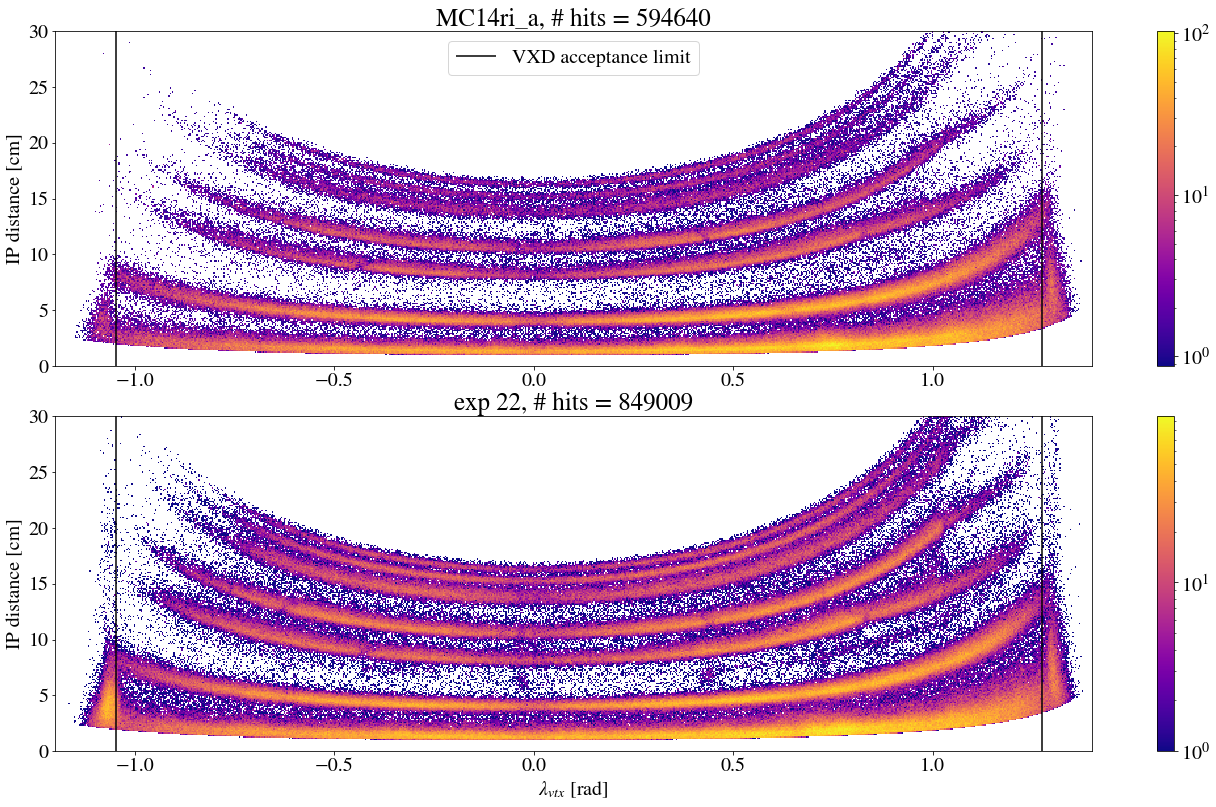

In [23]:
fig, (ax, ax2) = plt.subplots(2, figsize=(18, 10))
plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=1, 
                    wspace=0.05, 
                    hspace=0.15)
histmczrW, binsWx, binsWy, imw = ax.hist2d(df_filteredmc.gamma_lambda, 
                                           np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), 
                                           range=[(-1.2,1.4),(0,30)], bins=(790,250), 
                                           cmap='plasma', weights=df_filteredmc.weights, norm=LogNorm())

ax.vlines(-1.047,0,30, color='black', label='VXD acceptance limit')
ax.vlines(1.274,0,30, color='black')
ax.tick_params(labelsize=20);
ax2.tick_params(labelsize=20);
ax.set_title(r"MC14ri_a, # hits = %s" % (len(df_filteredmc.gamma_x), ), fontsize=25)
#plt.xlabel('Z-axis [cm]', fontsize=20)
ax.set_ylabel('IP distance [cm]', fontsize=20)
cbar=plt.colorbar(imw, ax=ax)
cbar.ax.tick_params(labelsize=20)
histzr, binsx, binsy, im = ax2.hist2d(df_filtered.gamma_lambda, 
                                      np.sqrt(df_filtered.gamma_dr**2+df_filtered.gamma_z**2), 
                                      range=[(-1.2,1.4),(0,30)], bins=(790,250), cmap='plasma', 
                                      weights=1/df_filt_theta.efficiency, norm=LogNorm())
ax2.vlines(-1.047,0,30, color='black', label='VXD acceptance limit')
ax2.vlines(1.274,0,30, color='black')
ax2.set_title(r"exp 22, # hits = %s" % (len(df_filtered.gamma_x), ), fontsize=25)
plt.xlabel(r'$\lambda_{vtx}$ [rad]', fontsize=20)
ax2.set_ylabel('IP distance [cm]', fontsize=20)
cbar=plt.colorbar(im, ax=ax2)
cbar.ax.tick_params(labelsize=20)
ax.legend(loc="upper center", fontsize=20)

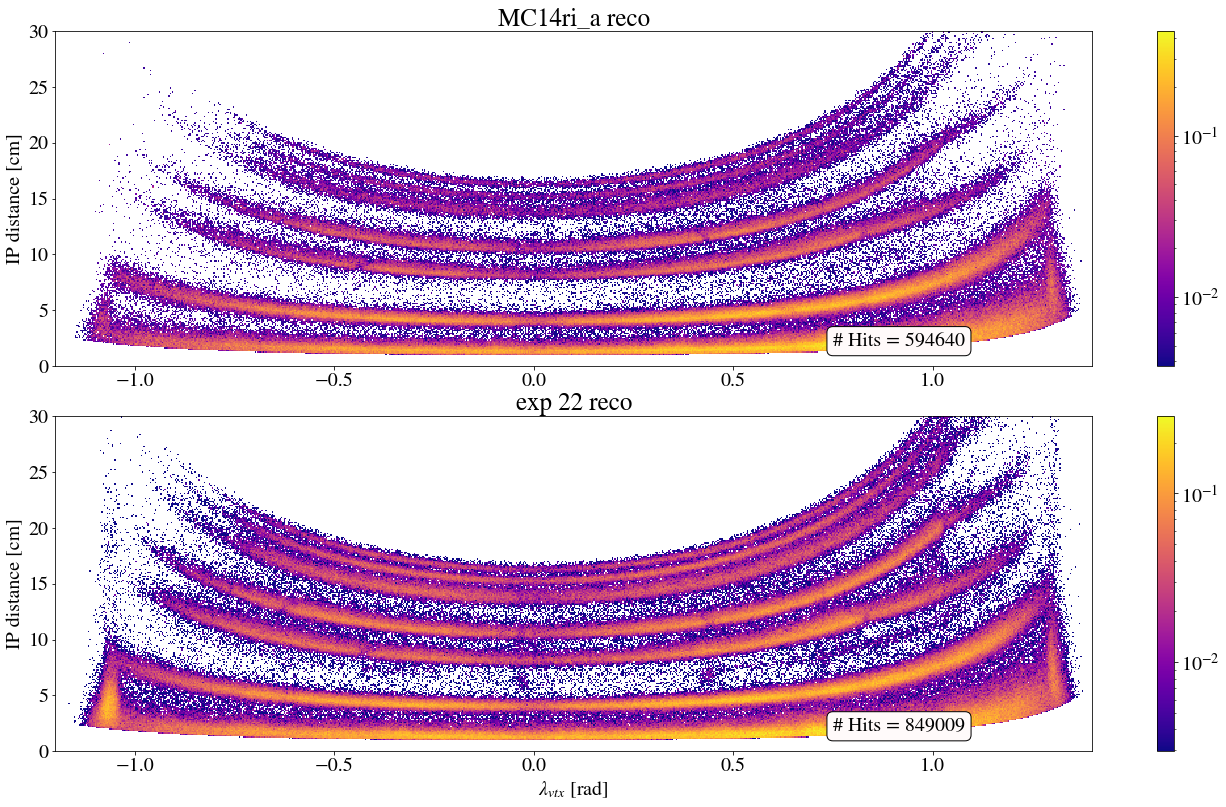

In [24]:
fig, (ax, ax2) = plt.subplots(2, figsize=(18, 10))
plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=1, 
                    wspace=0.05, 
                    hspace=0.15)
histmczrWn, binsWx, binsWy, imw = ax.hist2d(df_filteredmc.gamma_lambda, 
                                           np.sqrt(df_filteredmc.gamma_dr**2+df_filteredmc.gamma_z**2), 
                                           range=[(-1.2,1.4),(0,30)], bins=(790,250), 
                                           cmap='plasma', weights=df_filteredmc.weights, norm=LogNorm(),
                                           density=True)
ax.tick_params(labelsize=20);
ax2.tick_params(labelsize=20);
ax.set_title("MC14ri_a reco", fontsize=25)
#plt.xlabel('Z-axis [cm]', fontsize=20)
ax.set_ylabel('IP distance [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filteredmc.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.75, 0.1, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)
cbar=plt.colorbar(imw, ax=ax)
cbar.ax.tick_params(labelsize=20)
histzrn, binsx, binsy, im = ax2.hist2d(df_filtered.gamma_lambda, 
                                      np.sqrt(df_filtered.gamma_dr**2+df_filtered.gamma_z**2), 
                                      range=[(-1.2,1.4),(0,30)], bins=(790,250), cmap='plasma', 
                                      weights=1/df_filt_theta.efficiency, norm=LogNorm(), density=True)
#ax2.set_xlim(-20,40)
#ax2.set_ylim(0,17)
ax2.set_title("exp 22 reco", fontsize=25)
plt.xlabel(r'$\lambda_{vtx}$ [rad]', fontsize=20)
ax2.set_ylabel('IP distance [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filtered.gamma_x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.75, 0.1, textstr, transform=ax2.transAxes, fontsize=20, verticalalignment='top', bbox=props)
cbar=plt.colorbar(im, ax=ax2)
cbar.ax.tick_params(labelsize=20)

In [25]:
binsx = np.delete(binsWx, 790)
binsy = np.delete(binsWy, 250)

<ipython-input-26-c7b5506c321e>:1: RuntimeWarning: divide by zero encountered in true_divide
  diffzr = (histzrn - histmczrWn)/histmczrWn
<ipython-input-26-c7b5506c321e>:1: RuntimeWarning: invalid value encountered in true_divide
  diffzr = (histzrn - histmczrWn)/histmczrWn
<ipython-input-26-c7b5506c321e>:2: RuntimeWarning: divide by zero encountered in true_divide
  diffzrd = (histmczrWn - histzrn)/histmczrWn
<ipython-input-26-c7b5506c321e>:2: RuntimeWarning: invalid value encountered in true_divide
  diffzrd = (histmczrWn - histzrn)/histmczrWn


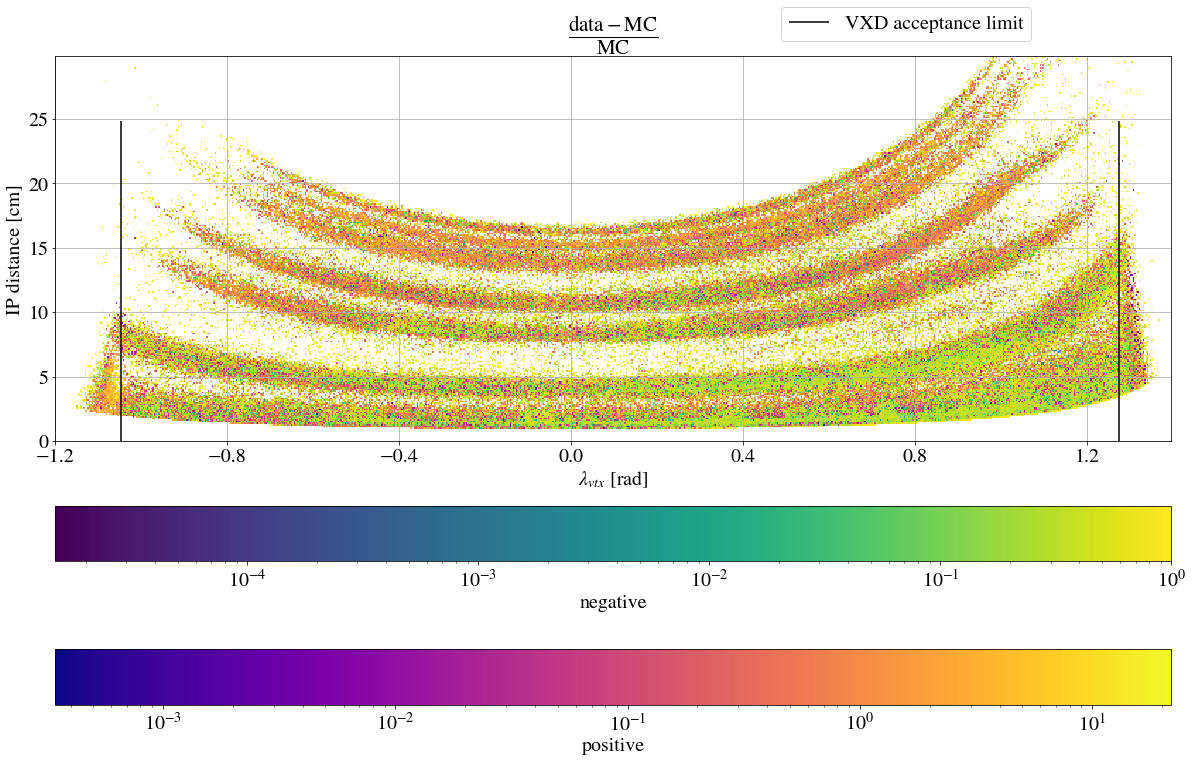

In [26]:
diffzr = (histzrn - histmczrWn)/histmczrWn
diffzrd = (histmczrWn - histzrn)/histmczrWn

fig, ax = plt.subplots(figsize=(20, 20))

im1 = ax.matshow(diffzr.T, cmap='plasma', origin='lower', 
                extent=[binsx[0],binsx[789],binsy[0],binsy[249]], norm=LogNorm())
cbar1 = plt.colorbar(im1, orientation="horizontal", pad=0.005)
cbar1.set_label("positive", fontsize=20)
cbar1.ax.tick_params(labelsize=20)

im2 = ax.matshow(diffzrd.T, origin='lower', 
                extent=[binsx[0],binsx[789],binsy[0],binsy[249]], norm=LogNorm())
cbar2 = plt.colorbar(im2, orientation="horizontal", pad=0.07)
cbar2.set_label("negative", fontsize=20)
cbar2.ax.tick_params(labelsize=20)


ax.set_aspect(0.03)
ax.set_title(r"$\frac{\mathrm{data-MC}}{\mathrm{MC}}$", fontsize=30)
plt.xlabel(r'$\lambda_{vtx}$ [rad]', fontsize=20)
ax.set_ylabel('IP distance [cm]', fontsize=20)

ax.tick_params(labelsize=20)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 0.4))
plt.gca().xaxis.tick_bottom()
plt.grid()

ax.vlines(-1.047,0,24.8, color='black', label='VXD acceptance limit')
ax.vlines(1.274,0,24.8, color='black')
plt.legend(loc=[0.65,1.04],fontsize=20)